In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

In [23]:
df = pd.read_csv('./housing.csv',delimiter=r"\s+",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = column_names

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [26]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [27]:
df.duplicated().sum()

0

<Axes: >

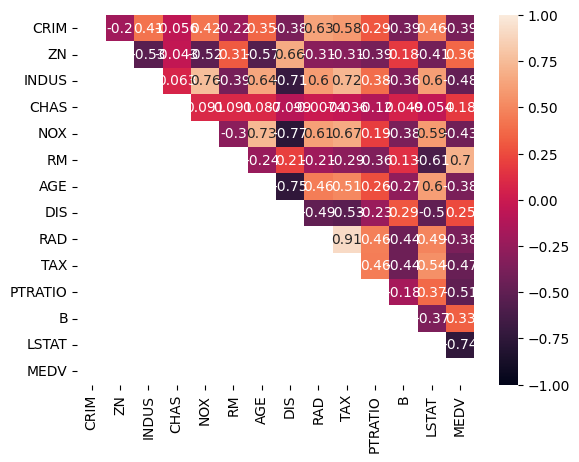

In [28]:
mask = np.tril(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(),vmin = -1, vmax = 1, annot=True, mask= mask)

In [29]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [30]:
X = df.drop(columns=['CHAS','MEDV'])
y = df['MEDV']



In [31]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [32]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [35]:
pred = lin_reg.predict(X_test)

In [36]:
pred

array([24.80502192, 23.99207878, 27.41969853, 12.22521383, 21.54089609,
       19.30502294, 20.70506397, 21.495484  , 18.94490741, 19.79344825,
        4.75978975, 16.4343098 , 17.29081528,  5.64718895, 38.15388163,
       32.57410093, 22.70379646, 37.01957565, 31.05648795, 23.25919894,
       24.92104056, 24.99282993, 20.64411415, 30.56600209, 22.55400948,
       10.168633  , 17.70825917, 18.49796497, 35.77195417, 21.08709139,
       18.5413341 , 18.01931143, 20.03791552, 24.23016879, 29.34270932,
       17.14453905, 11.29301586, 22.46300599, 17.65919302, 15.69991479,
       26.46863641, 20.99738044, 22.2127374 , 15.78922293, 22.90368303,
       25.37354909, 20.366435  , 20.84948352, 10.27162372, 24.36650689,
       18.72120276, 17.3722084 , 24.74428345, 30.0915379 , 13.45683478,
       21.89909332, 20.77900494, 15.37903094, 13.76748828, 20.0599973 ,
       17.4889214 , 21.74283257, 33.13151667, 31.34567345, 17.8919454 ,
       32.84969957, 18.97445875, 20.02078883, 19.17996866, 23.05

In [37]:
mse = np.sqrt(mean_squared_error (y_test, pred))
print(f'Mean error: {mse: 3.3} ({mse/np.mean(pred)*100:3.3}%)')
print(mse)

Mean error:  5.85 (26.7%)
5.849124083786654


In [38]:
score = lin_reg. score(X_train,y_train)
print( 'Model determination: ', score)

Model determination:  0.7690953567794605


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [40]:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline. fit(X_train,y_train)
pred = pipeline.predict(X_test)
mse = np. sqrt (mean_squared_error (y_test, pred))
print(f'Mean error: {mse: 3.3} ({mse/np.mean (pred)*100:3.31}%)')

Mean error:  5.06 (23.05196887546260953172350127716%)
